## Import Dependencies

In [1]:
# importing modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pprint import pprint


## Read athlete height dataset
### Source
enter source url here

### About
Contents: all Winter/Summer Olympic athletes and the events they participated in between 1898 and 2016<br>
Size: The raw data set is 271,116 rows

In [2]:
# athlete events df from csv
athletes_file = os.path.join("..","data", "rawData","athlete_events.csv")
athletes_df = pd.read_csv(athletes_file, encoding="ISO-8859-1")

# To get the raw data count, commented out to keep the original df .head() results prominent
raw_count = len(athletes_df)

# preview the raw data
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Winter, Summer, or Both?
### Description:
Our first analysis centered around the Season of the games in our data.  We batted ideas around like, it's possible that there is a bias in Winter sports because not every country has the opportunity/capitol/etc.  But before we started down that path, we looked to see how much data we had of each:

Summer: 222,552 (82%)
Winter:  48,564 (18%)


In [3]:
# checking to see how much data we have for each season
season_df = pd.DataFrame(athletes_df.groupby('Season')['ID'].count())

# adding a column for overall percentage
season_df['Percent of Total'] = (100*(season_df['ID']/raw_count)).round(1)

# look at %'s'
season_df.head()

# Should we plot this?

,ID,Percent of Total
Season,,
Summer,222552,82.1
Winter,48564,17.9


## Goodbye Snow/Ice!
### Removing Winter from our data
Since we had so much more summer data, plus other factors (Winter games used to share the same 4 year cycle, now the alternate...blah...blah), we decided to remove the Winter games from our data.  The new summer only data frame has 222,552 rows.


In [4]:
# New data fram to store the summer data only, using "loc"
summer_df = athletes_df.loc[athletes_df['Season']=='Summer']

# making sure it's a datafram (spoiler alert, it is)
# type(summer_df)

# get length of summer, just to verify
summer_count = len(summer_df)

# print once just to verify
# print(summer_count)

# Preview of Summer data
summer_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


## Time to delete all NaN, or Null, values without any investigation (just kidding Chris!)
### Missing Heights
We noticed right away that some of the height values were missing, particularly for the older Olympic games.  

### Find rows where athlete height are missing
We found 51,857 rows, or 23% of our Summer data, with missing height values.

In [5]:
# looking at records missing height
missing_df = summer_df.loc[summer_df['Height'].isnull()]
# missing_df.head()

# variable for missing count and percentage
missing_count = len(missing_df)
missing_pct = (100*(int(missing_count) / int(summer_count)))

# having trouble rounding that float!

# print the results...
print(f'Number of athlete/event rows missing the "height" value: {missing_count} {missing_pct}%')

Number of athlete/event rows missing the "height" value: 51857 23.30107121032388%


## Additional validation
Making sure the null count total made sense, by verifying with a group by year, and then sum... (it checks out!)

In [6]:
# create a group by object to count the number of missing rows by year
nullYear_group = missing_df.groupby('Year')['ID'].count()

nullYear_sum = nullYear_group.sum()

# print results
print(f'There is still this many rows missing height: {nullYear_sum}')


There is still this many rows missing height: 51857


## See how much this impacts us per Olympic year
We then looked to see how that 23% missing data impacted us by year.

In [7]:
# make a new df, grouping the summer data by year, counting the ID
year_count = pd.DataFrame(summer_df.groupby('Year')['ID'].count())

# add a new column to show missing count
year_count['Missing Height'] = nullYear_group

# add a new column to show percentage
year_count['Missing Pct'] = (100*(nullYear_group / year_count['ID'])).round(2)

# show all years, and their percent
year_count

# should we chart this? (bar chart by year, add label with the % missing?)


,ID,Missing Height,Missing Pct
Year,,,
1896,380,334,87.89
1900,1936,1820,94.01
1904,1301,1088,83.63
1906,1733,1476,85.17
1908,3101,2626,84.68
1912,4040,3319,82.15
1920,4292,3525,82.13
1924,5233,4348,83.09
1928,4992,4139,82.91


## Going post-war, hippie era!
### Focusing on the Summer games from 1960-2016
We decided since all of the games before 1960 were missing at least 50% of their height data, we decided to focus on the 15 games between 1960 and 2016.  We are now down to just 166,267 rows, we hope it's enough!

In [8]:
# New df of just post 60s Summer games
summerModern_df = summer_df.loc[summer_df['Year']>=1960]

# grab the count
summerModern_count = len(summerModern_df)

# we already have view of the same data above, so just print the new row count for now
print(f'In the modern era Summer games data, there are {summerModern_count} rows')

In the modern era Summer games data, there are 166267 rows


## Will still have null heights
Right now, we are dropping the remainder.<br>The new row count is 158,856.<br><br>We should maybe revisit and see if the missing data is skewed towards certain countries

In [9]:
# the dreaded drop nulls call...
summerClean_df = summerModern_df.dropna(how='any',subset=['Height'])

# get the count
summerClean_count = len(summerClean_df)

# preview the new df
summerClean_df.head()

# print the row count
print(f'There are {summerClean_count} rows left!')

There are 158856 rows left!


## Converting that crazy metric stuff...
### replacing the metric height and weight with the correct values!  Also adding new columns for medaling, yes or now
Cleaning the data, and adding a new column for categorical analysis


In [10]:
# converting metric to the correct system
type(summerClean_df)

summerClean_df['Height'] = summerClean_df['Height'].apply(lambda x: x / 2.54)
summerClean_df['Weight'] = summerClean_df['Weight'].apply(lambda x: x / .453592)

# Adding a new column based on whether or not the athlete medaled in the event
summerClean_df.loc[summerClean_df.Medal.isnull(), 'MedalYN']='No'
summerClean_df.loc[summerClean_df.Medal.notnull(), 'MedalYN']='Yes'

# adding a new sub-event column to get the specific event (i.e. "shotput")


# # preview
summerClean_df.head()


C:\Users\jerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jerem\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,MedalYN
0,1,A Dijiang,M,24.0,70.866142,176.369954,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,No
1,2,A Lamusi,M,23.0,66.929134,132.277465,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,No
31,12,Jyri Tapani Aalto,M,31.0,67.716535,154.323709,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,No
32,13,Minna Maarit Aalto,F,30.0,62.598425,122.356655,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,No
33,13,Minna Maarit Aalto,F,34.0,62.598425,122.356655,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,No


## How many sports per year, in our 15 year set?
### We thought it would be prudent to check and see how many sports we have per year.
Out of 36 sports in the Summer Games since 1960, 19 (53%) have data in all 15 Olympic games.<br>Do we need a chart here?

In [11]:
# sports = df['Sport'].unique().tolist()

# data frame of unique sports and year combinations
sportYears_df = pd.DataFrame(summerClean_df.groupby(['Sport','Year'])['Year'].count())

# another group by, this time to count the years for each sport (to make distribution)
sport_df = pd.DataFrame(sportYears_df.groupby('Sport')['Year'].count().reset_index())

# get the number of sports
sport_count = len(sport_df)

# see how many of them have 15 years
sportFull_df = sport_df.loc[sport_df['Year']==15]

# get the count of sports that have the full 15 Olympics
sportFull_count = len(sportFull_df)
sportFull_pct = 100*(sportFull_count / sport_count)

# print the results
print(f'Out of {sport_count} sports, only {sportFull_count}, or {sportFull_pct}% have 15 Olymic games data.')


Out of 36 sports, only 19, or 52.77777777777778% have 15 Olymic games data.


## Zoom in on the 19 sports with data in all 15 games
### more changes to the summer clean data
Cutting down to 19 sports<br>
There are 136,692 rows left to work with...

In [12]:
# drop the year column from our keep sports dataframe, we only need the sport
sportFull_df = sportFull_df.drop('Year', axis=1)

# merge the summer clean data with the sports list df, this will cut it to 19 sports
summerClean_df = pd.merge(sportFull_df, summerClean_df, on='Sport', how='inner')

# get the count
summerClean_count = len(summerClean_df)

# print the results
print(f'There are now {summerClean_count} rows to work with!')
      
# preview the data      
# summerClean_df.head()


There are now 136692 rows to work with!


## splitting out the data sets by gender
We need to fill in why, but we are splitting up the genders...<br>
There are 42,278 rows for women and 94,414 rows for men.

In [13]:
# olympic data for women
womens_data = summerClean_df.loc[summerClean_df['Sex']=='F']

# olympic data for men only...
mens_data = summerClean_df.loc[summerClean_df['Sex']=='M']

# get the count of data sets
mens_count = len(mens_data)
womens_count = len(womens_data)

print(f'There are {womens_count} rows for women and {mens_count} for men.')

There are 42278 rows for women and 94414 for men.


## Removed "Mixed" Sub events

In [31]:
mens_nonmixed_data = mens_data.loc[~mens_data['Event'].str.contains("Mixed")]
mens_nonmixed_data

,Sport,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal,MedalYN
0,Athletics,18,Timo Antero Aaltonen,M,31.0,74.409449,286.601175,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics Men's Shot Put,NaN,No
1,Athletics,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,73.622047,167.551456,France,FRA,2012 Summer,2012,Summer,London,"Athletics Men's 1,500 metres",NaN,No
4,Athletics,52,Patrick Abada,M,22.0,74.409449,176.369954,France,FRA,1976 Summer,1976,Summer,Montreal,Athletics Men's Pole Vault,NaN,No
5,Athletics,55,Antonio Abadia Beci,M,26.0,66.929134,143.300587,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,"Athletics Men's 5,000 metres",NaN,No
8,Athletics,86,Jos Manuel Abascal Gmez,M,22.0,71.653543,147.709836,Spain,ESP,1980 Summer,1980,Summer,Moskva,"Athletics Men's 1,500 metres",NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136686,Wrestling,135403,Eduards ukovs,M,20.0,68.897638,136.686714,Latvia,LAT,1992 Summer,1992,Summer,Barcelona,"Wrestling Men's Featherweight, Freestyle",NaN,No
136687,Wrestling,135433,David Santos Zuniga,M,28.0,64.960630,136.686714,United States,USA,1996 Summer,1996,Summer,Atlanta,"Wrestling Men's Featherweight, Greco-Roman",NaN,No
136688,Wrestling,135461,Jan urawski,M,28.0,64.566929,145.505212,Poland,POL,1960 Summer,1960,Summer,Roma,"Wrestling Men's Featherweight, Freestyle",NaN,No
136689,Wrestling,135493,Edward uawnik,M,27.0,64.960630,160.937583,Poland,POL,1960 Summer,1960,Summer,Roma,"Wrestling Men's Welterweight, Greco-Roman",NaN,No


## Break out Sub Events

In [32]:
event_group = pd.DataFrame(mens_nonmixed_data.groupby("Event")["ID"].count().reset_index())
event_group

,Event,ID
0,"Athletics Men's 1,500 metres",697
1,"Athletics Men's 10,000 metres",584
2,Athletics Men's 100 metres,1152
3,Athletics Men's 110 metres Hurdles,574
4,Athletics Men's 20 kilometres Walk,659
...,...,...
164,"Wrestling Men's Middleweight, Greco-Roman",277
165,"Wrestling Men's Super-Heavyweight, Freestyle",189
166,"Wrestling Men's Super-Heavyweight, Greco-Roman",188
167,"Wrestling Men's Welterweight, Freestyle",309


## Clean up Sub Events

In [33]:
subevents_data = mens_nonmixed_data["Event"].replace("Men's ","",regex=True)
subevents_data
mens_nonmixed_data["Sub Event"]=subevents_data
mens_nonmixed_data.head()

C:\Users\jerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sport,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal,MedalYN,Sub Event
0,Athletics,18,Timo Antero Aaltonen,M,31.0,74.409449,286.601175,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics Men's Shot Put,NaN,No,Athletics Shot Put
1,Athletics,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,73.622047,167.551456,France,FRA,2012 Summer,2012,Summer,London,"Athletics Men's 1,500 metres",NaN,No,"Athletics 1,500 metres"
4,Athletics,52,Patrick Abada,M,22.0,74.409449,176.369954,France,FRA,1976 Summer,1976,Summer,Montreal,Athletics Men's Pole Vault,NaN,No,Athletics Pole Vault
5,Athletics,55,Antonio Abadia Beci,M,26.0,66.929134,143.300587,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,"Athletics Men's 5,000 metres",NaN,No,"Athletics 5,000 metres"
8,Athletics,86,Jos Manuel Abascal Gmez,M,22.0,71.653543,147.709836,Spain,ESP,1980 Summer,1980,Summer,Moskva,"Athletics Men's 1,500 metres",NaN,No,"Athletics 1,500 metres"


   ## Find Average Heights of Olympians by Year and Sub Event

In [34]:
mens_meanheight_data=(mens_nonmixed_data.groupby(['Year','Sub Event'])['Height'].mean())
mens_minheight_data=(mens_nonmixed_data.groupby(['Year','Sub Event'])['Height'].min())
mens_maxheight_data=(mens_nonmixed_data.groupby(['Year','Sub Event'])['Height'].max())
mens_medianheight_data=(mens_nonmixed_data.groupby(['Year','Sub Event'])['Height'].median())
mens_meanheight_data
# mens_minheight_data
# mens_maxheight_data
mens_medianheight_data


Year  Sub Event                               
1960  Athletics 1,500 metres                      70.078740
      Athletics 10,000 metres                     67.716535
      Athletics 100 metres                        69.291339
      Athletics 110 metres Hurdles                72.244094
      Athletics 20 kilometres Walk                70.078740
                                                    ...    
2016  Wrestling Middleweight, Greco-Roman         68.503937
      Wrestling Super-Heavyweight, Freestyle      73.228346
      Wrestling Super-Heavyweight, Greco-Roman    74.803150
      Wrestling Welterweight, Freestyle           66.535433
      Wrestling Welterweight, Greco-Roman         66.929134
Name: Height, Length: 1960, dtype: float64

## Create DataFrame with Height Calcs

In [35]:
agg_df=pd.DataFrame(mens_nonmixed_data.groupby(['Year','Sub Event'])['ID'].count())
agg_df['Average Height']=mens_meanheight_data
agg_df['Median Height']=mens_medianheight_data
agg_df['Min Height']=mens_minheight_data
agg_df['Max Height']=mens_maxheight_data
agg_df

ID  Average Height  \
Year Sub Event                                                      
1960 Athletics 1,500 metres                    39       69.715324   
     Athletics 10,000 metres                   32       68.048720   
     Athletics 100 metres                      59       69.331376   
     Athletics 110 metres Hurdles              36       72.561242   
     Athletics 20 kilometres Walk              36       69.619423   
...                                            ..             ...   
2016 Wrestling Middleweight, Greco-Roman       20       68.917323   
     Wrestling Super-Heavyweight, Freestyle    20       73.759843   
     Wrestling Super-Heavyweight, Greco-Roman  19       74.740986   
     Wrestling Welterweight, Freestyle         21       66.347957   
     Wrestling Welterweight, Greco-Roman       18       66.622922   

                                               Median Height  Min Height  \
Year Sub Event                                                             
1960 Athletics 1,500 metres                        70.078740   61.023622   
     Athletics 10,000 metres                       67.716535   62.598425   
     Athletics 100 metres                          69.291339   62.992126   
     Athletics 110 metres Hurdles                  72.244094   67.716535   
     Athletics 20 kilometres Walk                  70.078740   64.173228   
...                                                      ...         ...   
2016 Wrestling Middleweight, Greco-Roman           68.503937   64.960630   
     Wrestling Super-Heavyweight, Freestyle        73.228346   69.685039   
     Wrestling Super-Heavyweight, Greco-Roman      74.803150   69.291339   
     Wrestling Welterweight, Freestyle             66.535433   64.173228   
     Wrestling Welterweight, Greco-Roman           66.929134   62.992126   

                                               Max Height  
Year Sub Event                                             
1960 Athletics 1,500 metres                     74.015748  
     Athletics 10,000 metres                    74.015748  
     Athletics 100 metres                       74.409449  
     Athletics 110 metres Hurdles               75.590551  
     Athletics 20 kilometres Walk               72.834646  
...                                                   ...  
2016 Wrestling Middleweight, Greco-Roman        75.196850  
     Wrestling Super-Heavyweight, Freestyle     78.740157  
     Wrestling Super-Heavyweight, Greco-Roman   79.921260  
     Wrestling Welterweight, Freestyle          69.685039  
     Wrestling Welterweight, Greco-Roman        68.897638  

[1960 rows x 5 columns]

## Removing Sub Events that don't appear in every Olympiad

In [36]:
mens_nonmixed_data


,Sport,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal,MedalYN,Sub Event
0,Athletics,18,Timo Antero Aaltonen,M,31.0,74.409449,286.601175,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics Men's Shot Put,NaN,No,Athletics Shot Put
1,Athletics,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,73.622047,167.551456,France,FRA,2012 Summer,2012,Summer,London,"Athletics Men's 1,500 metres",NaN,No,"Athletics 1,500 metres"
4,Athletics,52,Patrick Abada,M,22.0,74.409449,176.369954,France,FRA,1976 Summer,1976,Summer,Montreal,Athletics Men's Pole Vault,NaN,No,Athletics Pole Vault
5,Athletics,55,Antonio Abadia Beci,M,26.0,66.929134,143.300587,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,"Athletics Men's 5,000 metres",NaN,No,"Athletics 5,000 metres"
8,Athletics,86,Jos Manuel Abascal Gmez,M,22.0,71.653543,147.709836,Spain,ESP,1980 Summer,1980,Summer,Moskva,"Athletics Men's 1,500 metres",NaN,No,"Athletics 1,500 metres"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136686,Wrestling,135403,Eduards ukovs,M,20.0,68.897638,136.686714,Latvia,LAT,1992 Summer,1992,Summer,Barcelona,"Wrestling Men's Featherweight, Freestyle",NaN,No,"Wrestling Featherweight, Freestyle"
136687,Wrestling,135433,David Santos Zuniga,M,28.0,64.960630,136.686714,United States,USA,1996 Summer,1996,Summer,Atlanta,"Wrestling Men's Featherweight, Greco-Roman",NaN,No,"Wrestling Featherweight, Greco-Roman"
136688,Wrestling,135461,Jan urawski,M,28.0,64.566929,145.505212,Poland,POL,1960 Summer,1960,Summer,Roma,"Wrestling Men's Featherweight, Freestyle",NaN,No,"Wrestling Featherweight, Freestyle"
136689,Wrestling,135493,Edward uawnik,M,27.0,64.960630,160.937583,Poland,POL,1960 Summer,1960,Summer,Roma,"Wrestling Men's Welterweight, Greco-Roman",NaN,No,"Wrestling Welterweight, Greco-Roman"


In [38]:


# data frame of unique sports and year combinations
SubEventyears_df = pd.DataFrame(mens_nonmixed_data.groupby(['Sub Event','Year'])['Year'].count())
# SubEventyears_df.head()
# # another group by, this time to count the years for each sport (to make distribution)
SubEvent_df = pd.DataFrame(SubEventyears_df.groupby('Sub Event')['Year'].count().reset_index())
SubEvent_df
# # get the number of sports
SubEvent_count = len(SubEvent_df)

# # see how many of them have 15 years

SubEventFull_df = SubEvent_df.loc[SubEvent_df['Year']==15]
SubEventFull_df

SubEventFull_df = SubEventFull_df.drop('Year', axis=1)
further_cleaned_data = pd.merge(SubEventFull_df, agg_df, on='Sub Event', how='inner')
further_cleaned_data

,Sub Event,ID,Average Height,Median Height,Min Height,Max Height
0,"Athletics 1,500 metres",39,69.715324,70.078740,61.023622,74.015748
1,"Athletics 1,500 metres",43,70.069584,70.078740,64.960630,76.771654
2,"Athletics 1,500 metres",54,70.158938,70.472441,64.173228,74.015748
3,"Athletics 1,500 metres",65,70.290733,70.078740,61.811024,75.196850
4,"Athletics 1,500 metres",40,70.649606,70.866142,66.535433,76.377953
...,...,...,...,...,...,...
1255,"Wrestling Welterweight, Greco-Roman",19,67.612930,67.322835,64.960630,70.472441
1256,"Wrestling Welterweight, Greco-Roman",20,66.791339,66.929134,62.992126,69.685039
1257,"Wrestling Welterweight, Greco-Roman",20,67.342520,67.716535,65.748031,68.897638
1258,"Wrestling Welterweight, Greco-Roman",19,67.322835,67.716535,64.960630,70.866142


## Plot agg data to look for trends

ValueError: setting an array element with a sequence.

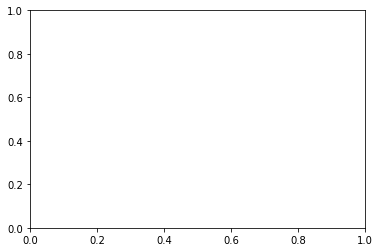

In [40]:
y=mens_medianheight_data.tolist()
# type(y)
x=mens_nonmixed_data['Year'].unique().tolist()


plt.plot([x,y])

## Importing the country olympic country code data...

In [21]:
# noc regions
regions_file = os.path.join("..", "data", "rawData", "noc_regions.csv")
regions_df = pd.read_csv(regions_file, encoding="ISO-8859-1")
regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
